### 1. Explorando Dados do Super Bowl: Jogos, Audiência e Shows de Intervalo

O Super Bowl, o evento que define o campeão da _National Football League (NFL)_, é muito mais que um jogo. É um fenômeno cultural que atrai milhões de espectadores globalmente, com comerciais caros e shows de intervalo que se tornam parte da cultura pop. Utilizando dados da [Wikipedia](https://pt.wikipedia.org/wiki/Super_Bowl), organizados em três arquivos `csv` (jogos, TV e shows de intervalo), vamos explorar como esses elementos se conectam. Vamos limpar e analisar os dados para responder a perguntas como:

- Quais foram os placares mais surpreendentes da história do Super Bowl?
- Como o desempenho das equipes influencia a audiência da TV?
- Como a audiência, avaliações de TV e custo dos comerciais evoluíram ao longo dos anos?
- Quais artistas se destacaram no show do intervalo com o maior número de músicas?

<p style="text-align:center"><img width="800px" src="https://media.gq-magazine.co.uk/photos/67a9d8f29e12c09cf12a4d42/16:9/w_1920,c_limit/1002-Kendrick-Superbowl.jpg"></p><p style="text-align:center"><em>Super Bowl LIX Halftime Show</em></p>

Esta análise combina esportes, entretenimento e marketing, oferecendo insights valiosos sobre um dos maiores eventos globais. Vamos mergulhar nos dados e descobrir o que torna o Super Bowl tão especial!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

super_bowls = pd.read_csv('datasets/super_bowls.csv')
tv = pd.read_csv('datasets/tv.csv')
halftime_musicians = pd.read_csv('datasets/halftime_musicians.csv')

display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


### 2. Preparando os Dados para Análise

Ao examinar os dados dos jogos do Super Bowl, notamos que o conjunto está quase completo, exceto por algumas lacunas nas colunas dos quarterbacks reservas (`qb_winner_2` e `qb_loser_2`). Isso era esperado, já que os quarterbacks titulares (`qb_winner_1` e `qb_loser_1`) costumam jogar a partida inteira, sem substituições frequentes.

Já nos dados de TV e dos artistas do show do intervalo, identificamos valores ausentes. Isso não é surpreendente, considerando que o Super Bowl acontece desde 1967, e algumas informações detalhadas (como o número de músicas tocadas no intervalo) podem não ter sido registradas de forma consistente ao longo dos anos. A Wikipedia, embora seja uma fonte valiosa, não é perfeita.

Uma análise técnica usando o método `.info()` nos dataframes `tv` e `halftime_musicians` confirmou a presença de valores nulos em várias colunas. Isso reforça a necessidade de uma limpeza cuidadosa dos dados antes de prosseguirmos com as análises. Vamos tratar esses problemas para garantir que os dados estejam prontos para gerar insights confiáveis.

In [2]:
tv.info()

print('\n')

halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

### 3. Distribuição das Pontuações nos Jogos: Identificando Tendências e Extremos

Nos dados de TV, algumas colunas cruciais apresentam valores ausentes:
- `total_us_viewers`: Número de espectadores nos EUA que assistiram a pelo menos uma parte da transmissão.
- `rating_18_49`: Porcentagem média de adultos (18-49 anos) em lares com TV que assistiram à transmissão inteira.
- `share_18_49`: Porcentagem média de adultos (18-49 anos) em lares com TV *ligada* que assistiram à transmissão inteira.

Já nos dados dos artistas do show do intervalo, cerca de um terço das apresentações não têm o número de músicas tocadas (`num_songs`) registrado. Essas lacunas podem ser resultado de falhas no registro histórico ou da perda de informações ao longo do tempo. Embora fosse interessante preencher essas lacunas (assistir a todos os shows do intervalo para contar as músicas seria divertido!), vamos prosseguir com os dados disponíveis, anotando suas limitações. Para começar, vamos analisar a distribuição dos pontos combinados (soma dos pontos dos dois times) em cada Super Bowl. 

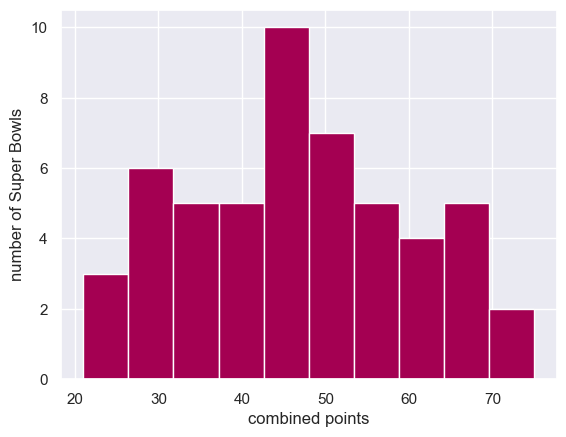

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [3]:
combined_pts = super_bowls['combined_pts']

plt.hist(combined_pts, color='#A40052')
plt.xlabel('combined points')
plt.ylabel('number of Super Bowls')
plt.show()

display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

### 4. Distribuição da Diferença de Pontos: Analisando o Equilíbrio dos Jogos

A maioria das pontuações combinadas nos Super Bowls fica na faixa de 40 a 50 pontos, com extremos em ambas as direções. Nos jogos de maior pontuação, como o Super Bowl LII (2018), vemos performances ofensivas impressionantes. Nesse jogo, o Patriots, liderado por Tom Brady, perdeu para o Eagles, comandado por Nick Foles, com um placar de 41-33, totalizando 74 pontos. Esse foi um exemplo de um jogo repleto de ação e grandes jogadas.

No outro extremo, encontramos jogos marcados por defesas dominantes e baixa pontuação. O Super Bowl IX (1975) é um exemplo clássico, com um placar de 16-6 entre Steelers e Vikings. Condições climáticas adversas, como chuva e temperaturas baixas (46 °F ou 8 °C), dificultaram o desempenho ofensivo de ambas as equipes, resultando em um jogo de baixa pontuação. Esse foi o segundo Super Bowl mais frio da história e o último a ser realizado em condições climáticas desfavoráveis por mais de 30 anos.

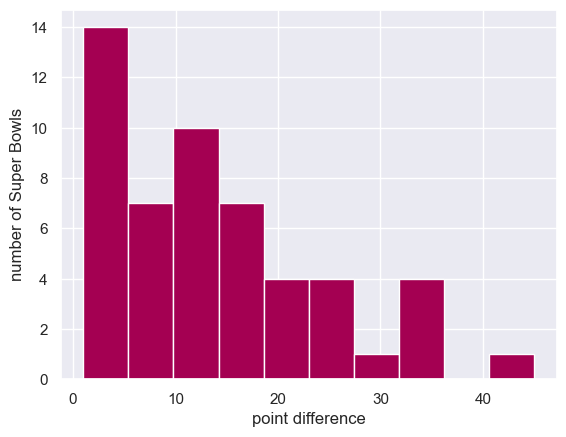

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35


In [4]:
plt.hist(super_bowls.difference_pts, color='#A40052')
plt.xlabel('point difference')
plt.ylabel('number of Super Bowls')
plt.show()

display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] == 35])

### 5. Grandes Diferenças de Pontos Afastam os Espectadores?

A maioria dos Super Bowls são jogos equilibrados, o que é esperado, já que as equipes que chegam à final geralmente estão em níveis competitivos semelhantes. O jogo mais disputado da história ocorreu em 1991, quando o Buffalo Bills perdeu para o New York Giants por apenas 1 ponto. Esse jogo é marcado pelo field goal perdido por Scott Norwood no último segundo, que iniciou uma sequência de quatro derrotas consecutivas do Bills no Super Bowl. Por outro lado, a maior diferença de pontos aconteceu em 1990, quando Joe Montana liderou o San Francisco 49ers a uma vitória esmagadora de 45 pontos sobre o Denver Broncos.

Mas será que grandes diferenças de pontos afastam os espectadores? Para responder a essa pergunta, podemos analisar a relação entre a diferença de pontos e o *share* (percentual de famílias nos EUA que assistiram à transmissão inteira). Plotando esses dados, podemos verificar se há uma correlação entre jogos desequilibrados e uma queda na audiência.

(Se os fãs desligam a TV quando o jogo fica muito desigual, esperaríamos ver uma correlação negativa entre a diferença de pontos e o *share*. Ou seja, quanto maior a diferença de pontos, menor seria o engajamento do público.)

<Axes: xlabel='difference_pts', ylabel='share_household'>

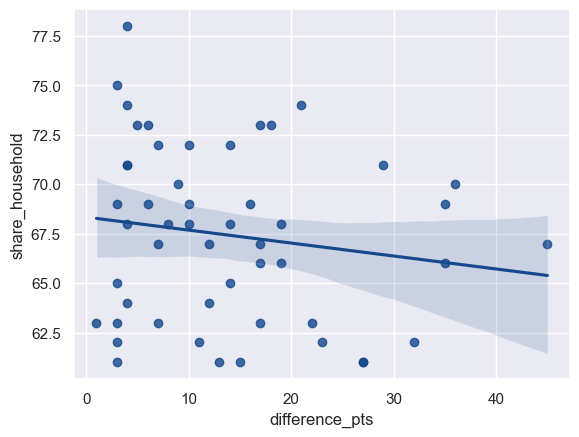

In [5]:
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

sns.regplot(data=games_tv, x='difference_pts', y='share_household', color='#15488C')

### 6. Audiência e a Evolução dos Custos Publicitários

Quando um jogo do Super Bowl se torna muito desigual, há uma tendência de os espectadores perderem o interesse. Isso é sugerido por uma linha de regressão que aponta para baixo, com um intervalo de confiança de 95%. No entanto, essa relação não é forte, especialmente porque nossa amostra é pequena (apenas 52 jogos). Portanto, é preciso cautela ao tirar conclusões definitivas.

Mas há uma certeza: _a maioria das pessoas fica até o show do intervalo_, independentemente do placar. Isso é uma ótima notícia para as redes de TV e os anunciantes, que pagam valores astronômicos para exibir seus comerciais. Hoje, um anúncio de 30 segundos custa impressionantes US$ 5 milhões. _Mas será que sempre foi assim? Como o número de espectadores e as classificações de audiência evoluíram em relação ao custo dos anúncios?_

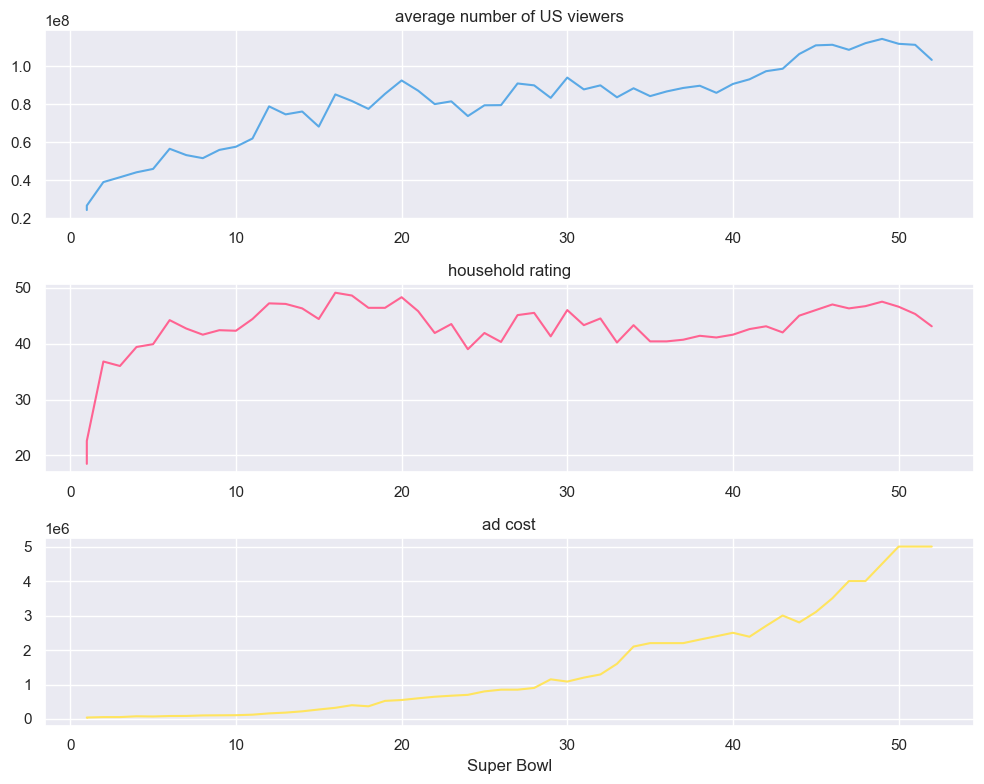

In [6]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#5aa9e6')
plt.title('average number of US viewers')

plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#ff6392')
plt.title('household rating')

plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#ffe45e')
plt.title('ad cost')
plt.xlabel('Super Bowl')

plt.tight_layout()

### 7. Os Shows do Intervalo Nem Sempre Foram Tão Espetaculares

Nem sempre o show do intervalo do Super Bowl foi o espetáculo de classe mundial que conhecemos hoje. Antes de se tornar um palco para estrelas globais, o evento era repleto de atrações curiosas — e, muitas vezes, bem menos impressionantes. Enquanto o número de espectadores crescia, os custos dos anúncios demoraram a acompanhar essa tendência. _Será que as redes de TV não tinham dados suficientes para ajustar os preços na época? Ou será que os shows simplesmente não eram tão bons assim?_

Ao revisitar os primeiros anos, fica claro que o intervalo do Super Bowl era bem diferente. Foi só em 1993, com a icônica performance de _Michael Jackson_ no _Super Bowl XXVII_, que a NFL percebeu o potencial do show do intervalo. A apresentação de MJ não só quebrou recordes de audiência, mas também transformou o intervalo em um evento cultural de grande importância. A partir daí, a liga passou a investir pesado em grandes nomes da música, elevando o padrão do espetáculo.

Ao explorar os dados de `halftime_musician`, fica evidente que o intervalo do Super Bowl só se tornou o fenômeno que é hoje graças à entrada de artistas de renome mundial. Antes disso, os shows eram, na maioria das vezes, modestos e até excêntricos. 

#### Impacto Cultural e Comercial:
- _Transformação do Intervalo_: De atrações curiosas para espetáculos globais, o show do intervalo se tornou um dos momentos mais aguardados do evento.
- _Audiência e Receita_: A presença de grandes artistas aumentou a audiência e, consequentemente, o valor dos comerciais.
- _Legado_: Artistas como Michael Jackson, Madonna, Beyoncé e Lady Gaga consolidaram o intervalo como um palco de prestígio internacional.

<p style="text-align:center"><img width="600px" src="https://64.media.tumblr.com/b48d86f9a45047d09faacda423927a41/9da60d6a6030f618-75/s540x810/5c94fd24a9c836e7e9c99b0773080cfb9bd14c2f.gifv"></p><p style="text-align:center"><em>Super Bowl LIX Halftime Show</em></p>

Essa evolução reflete não apenas mudanças nas preferências do público, mas também a estratégia da NFL em transformar o Super Bowl em um evento que transcende o esporte, unindo música, cultura e entretenimento.

In [7]:
halftime_musicians.musician[halftime_musicians.super_bowl <= 27]

80                                       Michael Jackson
81                                        Gloria Estefan
82                 University of Minnesota Marching Band
83                                 New Kids on the Block
84                                         Pete Fountain
85                                          Doug Kershaw
86                                           Irma Thomas
87                       Pride of Nicholls Marching Band
88                                     The Human Jukebox
89                                     Pride of Acadiana
90                                          Elvis Presto
91                                        Chubby Checker
92            San Diego State University Marching Aztecs
93                                        Spirit of Troy
94        Grambling State University Tiger Marching Band
95                                        Spirit of Troy
96                                        Up with People
97                             

### 8. Quem é o Astro das Aparições no Show do Intervalo?

O show do intervalo do Super Bowl nem sempre foi sinônimo de estrelas globais e produções milionárias. Nos primeiros anos, o evento era bem mais modesto, com atrações que iam de bandas marciais universitárias a performances inusitadas, como a de _Miss Texas 1973_ tocando violino. Era uma época em que o foco estava mais na tradição do que no espetáculo. Mas quem são os artistas que mais vezes subiram ao palco do intervalo? Vamos explorar alguns destaques:

- _Up with People_: Um grupo musical que marcou presença nos anos 70 e 80, trazendo ao palco uma mistura de música e mensagens otimistas.
- _Bandas Marciais_: Eram as grandes estrelas dos primeiros Super Bowls, representando escolas e universidades com performances cheias de vigor e disciplina.
- _Artistas Solo_: Alguns músicos, como o lendário clarinetista _Pete Fountain_, tiveram a honra de se apresentar mais de uma vez, embora com um estilo bem diferente do que vemos hoje.

Com o tempo, a NFL percebeu que o show do intervalo precisava de um upgrade. A entrada de ícones como _Michael Jackson_, _Madonna_, _Beyonce_ e, mais recentemente, _Rihanna_ e _Usher_, transformou o evento em um fenômeno cultural, capaz de atrair milhões de espectadores ao redor do mundo.

In [8]:
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

halftime_appearances.musician[halftime_appearances.super_bowl > 1]

28        Grambling State University Tiger Marching Band
1                                                Al Hirt
104                                       Up with People
83                                     The Human Jukebox
25              Florida A&M University Marching 100 Band
36                                     Justin Timberlake
5                                                Beyoncé
44     Los Angeles Unified School District All City H...
57                                                 Nelly
102                University of Minnesota Marching Band
76                                        Spirit of Troy
64                                         Pete Fountain
10                                            Bruno Mars
26                                        Gloria Estefan
Name: musician, dtype: object

### 9. Quem Detém o Recorde de Músicas em um Único Show do Intervalo?

O show do intervalo do Super Bowl é famoso por suas performances icônicas. Enquanto a _Grambling State University Tiger Marching Band_ detém o recorde de aparições (seis no total), artistas como _Beyoncé_, _Justin Timberlake_, _Nelly_ e _Bruno Mars_ se destacam por terem se apresentado mais de uma vez desde os anos 2000.

No entanto, ao analisar a coluna `num_songs`, que registra o número de músicas por apresentação, encontramos muitos valores ausentes. _Bandas marciais_ frequentemente não têm esses dados preenchidos, e, para artistas não marciais, as lacunas começam a aparecer a partir do Super Bowl XX.

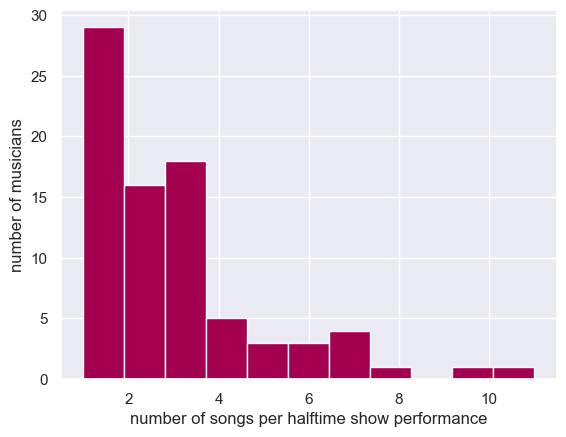

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
16,47,Beyoncé,7.0
2,51,Lady Gaga,7.0
33,41,Prince,7.0
90,23,Elvis Presto,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [9]:
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs, color='#A40052')
plt.xlabel('number of songs per halftime show performance')
plt.ylabel('number of musicians')
plt.show()

no_bands = no_bands.sort_values('num_songs', ascending=False)
display(no_bands.head(15))

### 10. Conclusão

Para resumir, a maioria dos artistas solo que se apresentam no show do intervalo do Super Bowl costumam tocar entre 1 e 3 músicas. Vale lembrar que o tempo do show é sempre o mesmo (cerca de 12 minutos), então o número de músicas acaba sendo mais um indicador de quantos hits o artista tem no repertório. Dito isso, _Justin Timberlake_ roubou a cena em 2018 com incríveis 11 músicas! E não podemos esquecer de _Diana Ross_, que ficou em segundo lugar com 10 músicas em um medley épico em 1996.

Neste projeto, mergulhamos nos dados do Super Bowl, desde os jogos até os comerciais e os famosos shows do intervalo. Passamos por todas as etapas: carregamento, limpeza e análise dos dados. Criamos histogramas para entender a distribuição dos pontos combinados, das diferenças de pontuação e até das performances dos artistas. Usamos gráficos de linha para comparar o aumento dos custos dos comerciais com o crescimento da audiência ao longo dos anos. E descobrimos algo curioso: quando o jogo fica muito desigual, o número de espectadores tende a cair.

<p style="text-align:center"><img src="https://64.media.tumblr.com/1e1673773dd55b5fc4158b56e331f4c6/9da60d6a6030f618-44/s540x810/c965bef588f661f1eb78d7ac9f1896bd7b60df1d.gifv"></p><p style="text-align:center"><em>Super Bowl LIX Halftime Show</em></p>

Este projeto nos mostrou como o Super Bowl evoluiu de um simples jogo de futebol americano para um fenômeno cultural que une esporte, música e entretenimento. Através da análise de dados, conseguimos entender melhor as tendências e os fatores que tornam esse evento tão especial.